In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rc('savefig', dpi=100, format='svg')
# matplotlib.rc('figure', figsize=(9, 8))
# matplotlib.rcParams['figure.figsize'] = (9, 8)

%matplotlib inline

In [2]:
colors = ['orange', 'yellow', 'y', 'lime', 'deepskyblue', 'deeppink']

## Apply Interpolation using various methods 

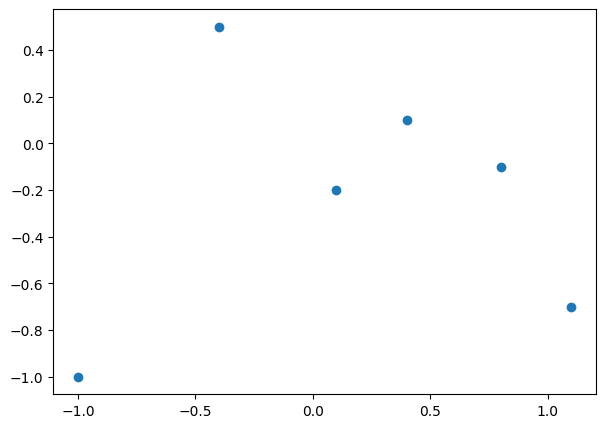

In [3]:
x = np.array([-1, -0.4, 0.1, 0.4, 0.8, 1.1])
y = np.array([-1, 0.5, -0.2, 0.1, -0.1, -0.7])

plt.figure(figsize=(7, 5))
plt.scatter(x, y)

## Try polynomial fit

In [4]:
### this is for drawing the interpolated curve
xs = np.linspace(x.min(), x.max(), 400)

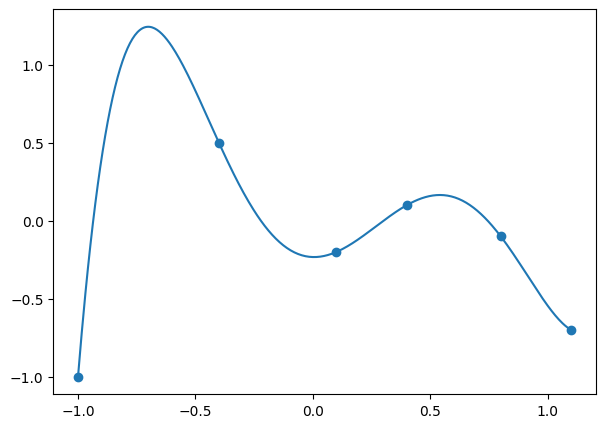

In [5]:
##### https://iq.opengenus.org/polynomial-regression-using-scikit-learn/
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### generating polynomial features and doing linear regression over it
poly_feat=PolynomialFeatures(degree=len(x)-1)
X_poly=poly_feat.fit_transform(x.reshape(-1, 1))
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)

yout_poly = lin_reg.predict(poly_feat.transform(xs.reshape(-1, 1)))

plt.figure(figsize=(7, 5))
plt.scatter(x, y)
plt.plot(xs, yout_poly)

### Try spline fit

In [6]:
### https://www.geeksforgeeks.org/cubic-spline-interpolation/

from scipy.interpolate import CubicSpline, interp1d

cubic_spline = interp1d(x,y, kind="cubic")
quad_spline = interp1d(x,y, kind="quadratic")
linear_spline = interp1d(x,y, kind="linear")
  
# plt.figure(figsize=(7, 5))

yout_cubs = cubic_spline(xs)
# plt.scatter(x, y, label="points")
# plt.plot(xs, yout_cubs, label='cubic-spline')

yout_quads = quad_spline(xs)

yout_lins = linear_spline(xs)
# plt.plot(xs, yout_lins, label='linear-spline')
# plt.legend()
# plt.show()

## Import my neural network library (made from scratch in numpy)
####  https://github.com/tsumansapkota/mylibrary

In [7]:
import mylibrary.nnlib as tnn

In [8]:
np.random.seed(13)
optim = tnn.SGD(learning_rate=0.01)

linear1 = tnn.LinearLayer(1, 6, optimizer=optim)
acivation = tnn.Relu()
linear2 = tnn.LinearLayer(6, 1, optimizer=optim)

In [9]:
# %matplotlib tk
# fig = plt.figure()
# ax = fig.add_subplot(111)
jump = 500

for step in range(60000):
    z1 = linear1.forward(x.reshape(-1, 1))
    a1 = acivation.forward(z1)
    yout = linear2.forward(a1)
    
    dy = yout-y.reshape(-1, 1)
    da1 = linear2.backward(dy)
    dz1 = acivation.backward(da1)
    dx = linear1.backward(dz1)
    
    linear1.update()
    linear2.update()
    
#     if step%jump == 0:
#         err = 0.5*(dy**2).mean()
        
#         print(f"Step: {step} -> Error: {err}")
        
        
#         z1 = linear1.forward(xs.reshape(-1, 1))
#         a1 = acivation.forward(z1)
#         yout_nn = linear2.forward(a1)
        
#         ax.clear()
#         ax.scatter(x, y, c=y, s=50, edgecolors='k', lw=0.5, label="Data")
#         ax.plot(xs, yout_nn.reshape(-1), lw=3, color="r", label="Prediction")
#         for i in range(linear2.weights.shape[0]):
#             yi = a1[:,i]*linear2.weights[i]# + linear2.bias/linear2.weights.shape[0]
#             ax.plot(xs, yi, lw=2, color=colors[i], linestyle='dashed')
#         ax.plot(x, np.zeros_like(x)+linear2.bias, lw=2, color=colors[-1], linestyle='dashed', label=f'b2')
        
#         ax.legend()
#         ax.set_xlabel("X1")
#         ax.set_ylabel('X2')
#         ax.set_xlim((x.min()-0.1, x.max()+0.1))
#         ax.set_ylim((y.min()-0.1, y.max()+0.1))
#         ax.grid()

#         fig.canvas.draw()
#         plt.pause(0.01)

In [10]:
z1 = linear1.forward(xs.reshape(-1, 1))
a1 = acivation.forward(z1)
yout_nn = linear2.forward(a1)

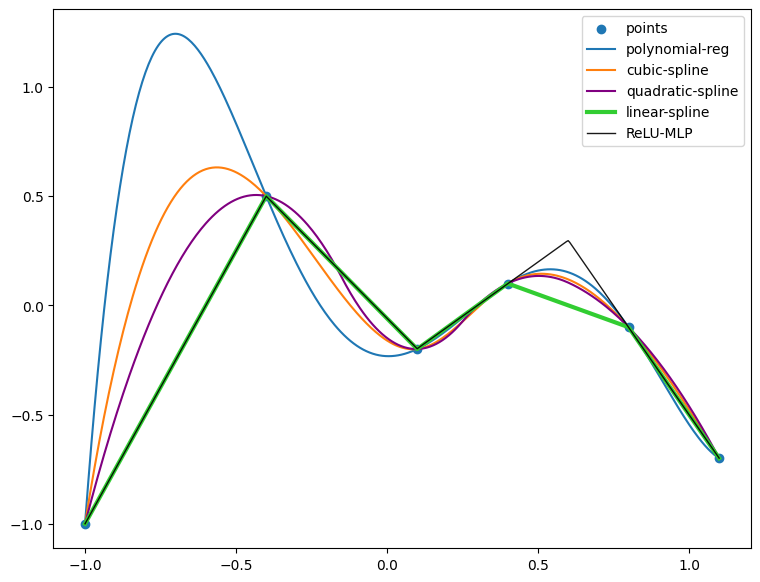

In [11]:
## Plot all the outputs here
%matplotlib inline
# plt.figure(figsize=(7, 5))
plt.figure(figsize=(9, 7))


plt.scatter(x, y, label="points")
plt.plot(xs, yout_poly, label="polynomial-reg")
plt.plot(xs, yout_cubs, label='cubic-spline')
plt.plot(xs, yout_quads, color='purple', label='quadratic-spline')
plt.plot(xs, yout_lins, lw=3, color='limegreen', label='linear-spline')
# plt.plot(xs, yout_dt, label='decision-tree')
plt.plot(xs, yout_nn.reshape(-1), lw=1, color="k", label="ReLU-MLP", alpha=0.9)
plt.legend()
plt.savefig("./00_different_interpolation_1d.svg")
plt.show()

## 1 piece of linear spline

(-0.46461359711551475,
 0.6434336481235505,
 -0.11834150165363105,
 0.9006236209031621)

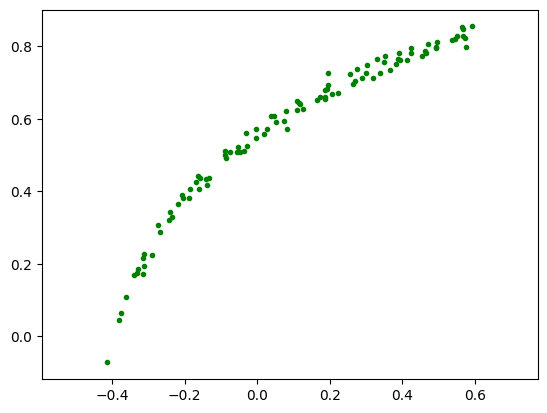

In [12]:
np.random.seed(13)

x = np.linspace(0,1,100)
# x = np.linspace(0.5,0.65,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = np.log(10*x + 1)*0.7
noise = np.random.normal(0,0.02, x.shape)
y = y*0.5 + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

plt.axis("equal")

In [13]:
from mylibrary import splinelib as tsp

In [14]:
max_points = 20
lr=0.1

spline = tsp.Spline1D(2, x, y)
spline.n_max = max_points

In [15]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(50):

    Y = spline.forward(x)
    
    dy = Y-y
    dx = spline.backward(dy)
    spline.update(lr)
    
#     if step % 100 == 0:# and step!=0:
#         spline._remove_close_points_()
#         spline._combine_linear_points_()
#         spline._remove_no_input_points_()
#         spline._add_new_point_()
        
    if step % 10 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.plot(spline.X, spline.Y, marker='.', color='r')
#         plt.plot(spline.X, spline.Y+spline.X, marker='.', color='r')
#         plt.scatter(x, dx, marker='.', color='c')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
Steps 0
Error 0.15872394083240665


_______________________
Steps 10
Error 0.06393177488979744


_______________________
Steps 20
Error 0.028676725930497575


_______________________
Steps 30
Error 0.015798931868673056


_______________________
Steps 40
Error 0.01106876304081085




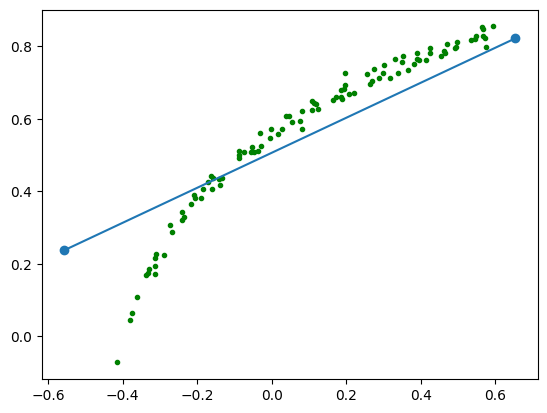

In [16]:
%matplotlib inline

plt.scatter(x, y, marker='.', color='g')
plt.plot(spline.X, spline.Y, marker='o')

In [17]:
# spline.Y[1] = 1.5

In [18]:
Y = spline.forward(x)
dy = Y-y
dx = spline.backward(dy)

In [19]:
spline.del_X

array([-0.00426294,  0.01188889])

In [20]:
spline.del_Y

array([ 0.00883452, -0.02463855])

In [21]:
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

def make_legend_arrow(legend, orig_handle,
                      xdescent, ydescent,
                      width, height, fontsize):
    p = mpatches.FancyArrow(0, 0.5*height, width, 0, length_includes_head=True, head_width=0.75*height )
    return p

(-0.6339867717111883,
 0.7302426963697317,
 -0.13051435012978188,
 1.1562534389023291)

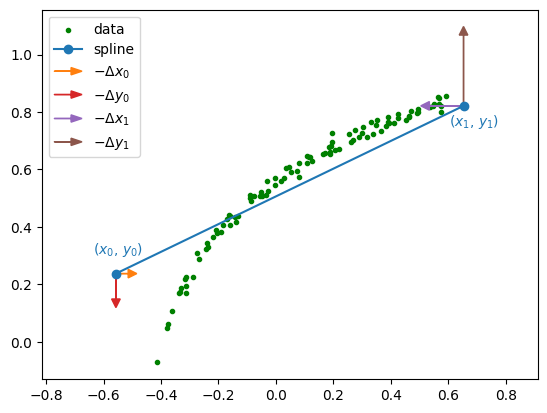

In [22]:
%matplotlib inline

dt=plt.scatter(x, y, marker='.', color='g')
color = matplotlib.cm.tab10(0)
dt1, =plt.plot(spline.X, spline.Y, marker='o', color=color, zorder=10)

plt.text(spline.X[0]-0.08, spline.Y[0]+0.07, s=r"($x_0$, $y_0$)", color=color, zorder=10)
plt.text(spline.X[1]-0.05, spline.Y[1]-0.07, s=r"($x_1$, $y_1$)", color=color, zorder=10)


dx, dy = spline.del_X*10, spline.del_Y*10

color = matplotlib.cm.tab10(1)
a0=plt.arrow(spline.X[0], spline.Y[0], -dx[0], 0, head_width=0.03, head_length=0.03, fc=color, ec=color)#, label=r"$\Delta x_0$")
color = matplotlib.cm.tab10(3)
a1=plt.arrow(spline.X[0], spline.Y[0], 0, -dy[0], head_width=0.03, head_length=0.03, fc=color, ec=color)#, label=r"$\Delta y_0$")
color = matplotlib.cm.tab10(4)
a2=plt.arrow(spline.X[1], spline.Y[1], -dx[1], 0, head_width=0.03, head_length=0.03, fc=color, ec=color)#, label=r"$\Delta x_1$")
color = matplotlib.cm.tab10(5)
a3=plt.arrow(spline.X[1], spline.Y[1], 0, -dy[1], head_width=0.03, head_length=0.03, fc=color, ec=color)#, label=r"$\Delta y_1$")

plt.legend([dt,dt1,a0,a1,a2,a3], ["data","spline",r"$-\Delta x_0$", r"$-\Delta y_0$", r"$-\Delta x_1$", r"$-\Delta y_1$"], handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow),})
plt.axis("equal")

## Multiple pieces

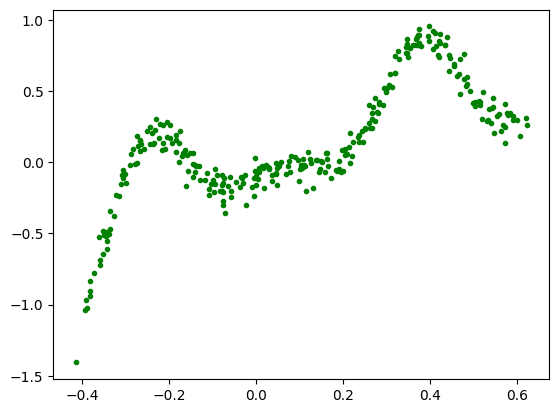

In [23]:
%matplotlib inline

np.random.seed(13)
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.07, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [24]:
lr=0.1
spline = tsp.Spline1D(5, x, y)

In [25]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(500):

    Y = spline.forward(x)
    
    dy = Y-y
    dx = spline.backward(dy)
    spline.update(lr)
    
#     if step % 100 == 0:# and step!=0:
#         spline._remove_close_points_()
#         spline._combine_linear_points_()
#         spline._remove_no_input_points_()
#         spline._add_new_point_()
        
    if step % 10 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.plot(spline.X, spline.Y, marker='.', color='r')
#         plt.plot(spline.X, spline.Y+spline.X, marker='.', color='r')
#         plt.scatter(x, dx, marker='.', color='c')

        plt.xlim(x.min()-0.2, x.max()+0.2)
        plt.ylim(y.min()-0.6, y.max()+0.2)
    
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
Steps 0
Error 0.08724965016798976


_______________________
Steps 10
Error 0.07075726222454978


_______________________
Steps 20
Error 0.06040920192452443


_______________________
Steps 30
Error 0.05367437750877952


_______________________
Steps 40
Error 0.04949772270110133


_______________________
Steps 50
Error 0.04671265271173318


_______________________
Steps 60
Error 0.04476171574551769


_______________________
Steps 70
Error 0.043303490304242874


_______________________
Steps 80
Error 0.04209568997757333


_______________________
Steps 90
Error 0.04103940655426578


_______________________
Steps 100
Error 0.040063767135664535


_______________________
Steps 110
Error 0.039144092393849354


_______________________
Steps 120
Error 0.03826736151244191


_______________________
Steps 130
Error 0.0374833787522807


_______________________
Steps 140
Error 0.036716490854143725


_______________________
Steps 150
Error 0.03570879623966407


________________

## area of triangle

In [26]:
x,y = np.array([
    [0,0],
    [1,0.7],
    [2,0.2]
]).T
x,y

(array([0., 1., 2.]), array([0. , 0.7, 0.2]))

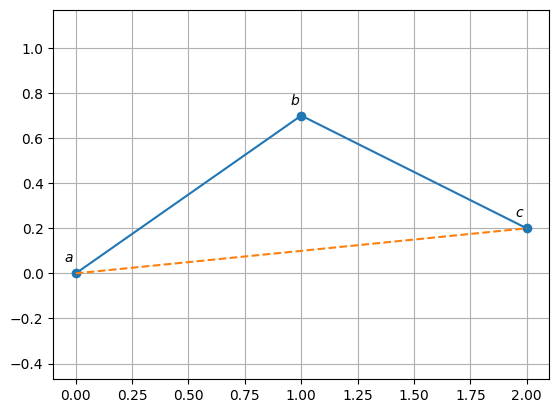

In [27]:
%matplotlib inline
plt.plot(x,y, marker='o')
plt.plot([x[0],x[2]],[y[0],y[2]], linestyle='dashed')
plt.text(x[0]-0.05, y[0]+0.05, r"$a$")
plt.text(x[1]-0.05, y[1]+0.05, r"$b$")
plt.text(x[2]-0.05, y[2]+0.05, r"$c$")
plt.axis("equal")
plt.grid()

In [28]:
x1,y1 = np.array([
    [0,0],
    [1,0.2],
    [2,0.2]
]).T
x1,y1

(array([0., 1., 2.]), array([0. , 0.2, 0.2]))

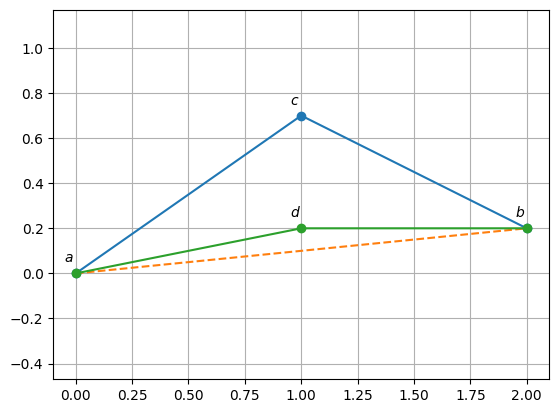

In [29]:
%matplotlib inline
plt.plot(x,y, marker='o')
plt.plot([x[0],x[2]],[y[0],y[2]], linestyle='dashed')
plt.text(x[0]-0.05, y[0]+0.05, r"$a$")
plt.text(x[1]-0.05, y[1]+0.05, r"$c$")
plt.text(x[2]-0.05, y[2]+0.05, r"$b$")

plt.plot(x1,y1, marker='o')
# plt.plot([x[0],x[2]],[y[0],y[2]], linestyle='dashed')
plt.text(x1[1]-0.05, y1[1]+0.05, r"$d$")


plt.axis("equal")
plt.grid()

## dynamic pw-spline

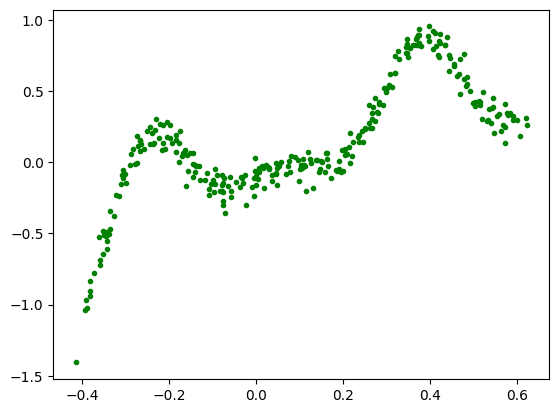

In [30]:
%matplotlib inline

np.random.seed(13)
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.07, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [31]:
max_points = 20
lr=0.1
spline = tsp.Spline1D(2, x, y)
spline.n_max = max_points

In [32]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(1000):

    Y = spline.forward(x)
    
    dy = Y-y
    dx = spline.backward(dy)
    spline.update(lr)
    
    if step % 100 == 0 and step!=0:
        spline._remove_close_points_()
        spline._combine_linear_points_()
        spline._remove_no_input_points_()
        spline._add_new_point_()
        
    if step % 10 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.plot(spline.X, spline.Y, marker='.', color='r')
#         plt.plot(spline.X, spline.Y+spline.X, marker='.', color='r')
#         plt.scatter(x, dx, marker='.', color='c')

        plt.xlim(x.min()-0.2, x.max()+0.2)
        plt.ylim(y.min()-0.6, y.max()+0.2)
        
        plt.text(x.min(), y.max(), f"MSE:{error:.4f}  Step:{step}")
    
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
Steps 0
Error 0.13821151586608102


_______________________
Steps 10
Error 0.11022467978342258


_______________________
Steps 20
Error 0.096572812812722


_______________________
Steps 30
Error 0.08893916819851223


_______________________
Steps 40
Error 0.08449780935653677


_______________________
Steps 50
Error 0.08115253407128502


_______________________
Steps 60
Error 0.07865542807356064


_______________________
Steps 70
Error 0.07686051363895495


_______________________
Steps 80
Error 0.07563272349092277


_______________________
Steps 90
Error 0.07483596421492296


_______________________
Steps 100
Error 0.07438374787962726


_______________________
Steps 110
Error 0.09899351537879661


_______________________
Steps 120
Error 0.0827051030571589


_______________________
Steps 130
Error 0.07501717854099046


_______________________
Steps 140
Error 0.0710731576826421


_______________________
Steps 150
Error 0.06898166439359533


_______________________

In [33]:
asasa

NameError: name 'asasa' is not defined

## More non-linearity

In [ ]:
%matplotlib inline

np.random.seed(13)
x = np.linspace(0,2,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.07, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
plt.scatter(x, y, marker='.', color='g')

In [ ]:
max_points = 20
lr=0.1
spline = tsp.Spline1D(2, x, y)
spline.n_max = max_points

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(1400):

    Y = spline.forward(x)
    
    dy = Y-y
    dx = spline.backward(dy)
    spline.update(lr)
    
    if step % 100 == 0:# and step!=0:
        spline._remove_close_points_()
        spline._combine_linear_points_()
        spline._remove_no_input_points_()
        spline._add_new_point_()
        
    if step % 10 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.plot(spline.X, spline.Y, marker='.', color='r')
#         plt.plot(spline.X, spline.Y+spline.X, marker='.', color='r')
#         plt.scatter(x, dx, marker='.', color='c')

        plt.xlim(x.min()-0.2, x.max()+0.2)
        plt.ylim(y.min()-0.6, y.max()+0.4)

        plt.text(x.min(), y.max(), f"MSE:{error:.4f}  Step:{step}")
    
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

## 2D Spline

In [ ]:
np.random.seed(13)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

import mylibrary.splinelib_nd as tsn
# matplotlib.rcParams['figure.figsize'] = (12, 8)

In [ ]:
def initialize3Dplot(X1, X2, Y):
    matplotlib.rcParams['figure.figsize'] = (8, 6)    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(X1, X2, Y)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    return ax

In [ ]:
color_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
              'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
              'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
             ]
#########################################################        

def plot_triangle(array, c, linestyle):
    '''
    Array must be shape = (3,2)
    '''
#     X1, X2 = self.X[node.indices][:,0], self.X[node.indices][:,1]
    px1 = np.append(array[:,0], array[:1,0])
    px2 = np.append(array[:,1], array[:1,1])
    plt.plot(px1, px2, lw=2, c=c, linestyle=linestyle)    

def plot_piece2D_v0(self:tsn.SplineND):
    depth = 0
    node_list = [self.root]
    matplotlib.rcParams['figure.figsize'] = (12, 10)    
    while(len(node_list) >0 ):
        node = node_list.pop()
        X = self.X[node.indices]
        linestyle = "solid"
        if depth >1:
            linestyle = "dashed"
        plot_triangle(X, color_list[depth], linestyle)
        depth+=1
        
        if node.is_branch:
            for spn in node.splitNodes:
                node_list.append(spn)
        continue
    return
#########################################################        
def plot_tristar(corners, pointx, pointy, line_color):
    for corner in corners:
#         plt.plot(corner[0], corner[1], point[0], point[1], color=color)
        plt.plot([corner[0], pointx[0]], [corner[1], pointx[1]], color=line_color)
    plt.scatter([pointx[0]], [pointx[1]], c=pointy)
        
        
def plot_piece2D_v1(self:tsn.SplineND):
    depth = 0
    matplotlib.rcParams['figure.figsize'] = (12, 10)
    
    X_ = self.X[self.root.indices]
    Y_ = self.Y[self.root.indices]
    plot_triangle(X_, c='r', linestyle="solid")
    plt.scatter(X_[:,0], X_[:,1], c=Y_.reshape(-1))
        
    node_list = [self.root]
    while(len(node_list) >0 ):
        node = node_list.pop()
        if not node.is_branch: continue
            
        corners = self.X[node.indices]
        pointx = self.X[node.split_index]
        pointy = self.Y[node.split_index]
        plot_tristar(corners, pointx, pointy, color_list[depth])
        
        depth+=1
        if node.is_branch:
            for spn in node.splitNodes:
                node_list.append(spn)
        continue
    return

In [ ]:
num_points = 50
X1 = np.linspace(-2.5, 2.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
X1 = X1.reshape(-1)
X2 = X2.reshape(-1)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.
Y = Y*0.1

XX = np.c_[X1, X2]
YY = Y.reshape(-1,1)

In [ ]:
# %matplotlib tk
# fig = initialize3Dplot(X1, X2, Y)
# plt.show()

### For 3D data

In [ ]:
piece2D = tsn.SplineND(2)

In [ ]:
piece2D.make_root_global_coverage2(XX)
# piece2D.make_root_global_coverage(XX)

# piece2D.Y = np.array([1,-1,-3])

In [ ]:
%matplotlib inline
plt.scatter(X1, X2, c=Y)
plot_piece2D_v1(piece2D)
plt.show()

In [ ]:
# %matplotlib tk
# fig = plt.figure(figsize=(7,6))
# ax = fig.gca(projection='3d')
# perror = 9999999.
# for epoch in range(1, 101):
#     yout = piece2D.forward(XX)
#     dy = yout - YY
#     dx = piece2D.backward(dy)
    
#     piece2D.update(0.3)
    
# #     if epoch%10 == 0 and epoch !=0:
# #         piece2D.make_root_global_coverage2()
# #         piece2D.add_new_point()

#     if epoch%10 == 0:
#         error = (dy**2).mean()
#         print(epoch, 'Error = ', error)
#         if error > perror :
#             print('???????\n^^^^^^^')
#             break
#         perror = error
        
#         ax.clear()
        
#         ax.scatter(X1, X2, Y)
#         ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
# #         ax.scatter(piece2D.X[:,0], piece2D.X[:,1], piece2D.Y, lw=5, c='r')
        
#         ax.set_xlabel('X1')
#         ax.set_ylabel('X2')
#         ax.set_zlabel('Y')
        
#         fig.canvas.draw()
#         plt.pause(0.01)
#         print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
#         if error < 0.00025:
#             print('fitted to our expectation')
#             break

## Add Neurons below

In [ ]:
# #### to add neuron multiple time, find maximum error node
# yout = piece2D.forward(XX)
# dy = yout - YY
# dx = piece2D.backward(dy)

# err, node = piece2D.root.get_maximum_error_node()
# err, node.indices

In [ ]:
# %matplotlib inline
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
# ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Y')
# plt.show()

In [ ]:
# %matplotlib inline
# plt.scatter(X1, X2, c=Y)
# plot_piece2D_v1(piece2D)
# plt.show()

In [ ]:
## Add new neuron

In [ ]:
# piece2D.add_new_point()

## Show above addition in continuous viz

In [ ]:
%matplotlib inline

for i in range(8):
    yout = piece2D.forward(XX)
    dy = yout - YY
    dx = piece2D.backward(dy)

    err, node = piece2D.root.get_maximum_error_node()
    
    plt.figure(figsize=(5,4))
#     plt.scatter(X1, X2, c=Y)
    plot_piece2D_v1(piece2D)
    plt.show()
    
    piece2D.add_new_point()
    pass